In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
import numpy

import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [2]:
batch_size = 128
number_classes = 10
epochs = 4

image_rows, image_columns = 28, 28
input_shape = (image_rows, image_columns)

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = keras.utils.normalize(x_train, axis=1)
x_test = keras.utils.normalize(x_test, axis=1)

In [4]:
y_train = keras.utils.to_categorical(y_train, number_classes)
y_test = keras.utils.to_categorical(y_test, number_classes)

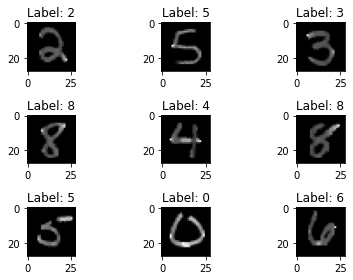

In [5]:
figure, axes = plt.subplots(3,3)
random_number = random.randint(0,x_train.shape[0])
plot_samples = x_train[random_number:random_number+9,:,:]
plot_samples_values = numpy.argmax(y_train[random_number:random_number+9], axis=1)

for index in range(9):
    ax = axes[index//3, index%3]
    ax.imshow(plot_samples[index], cmap='gray')
    ax.set_title('Label: {}'.format(plot_samples_values[index]))
    
plt.tight_layout()
plt.show()

In [6]:
model = Sequential()

model.add(LSTM(50, return_sequences=True,input_shape = input_shape))
model.add(LSTM(50))

model.add(Dense(32, activation = 'relu'))
model.add(Dense(number_classes, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 50)            15800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 32)                1632      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 37,962
Trainable params: 37,962
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [8]:
stats = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/4
422/422 [==============================] - 40s 94ms/step - loss: 0.8934 - accuracy: 0.6965 - val_loss: 0.3078 - val_accuracy: 0.9113
Epoch 2/4
422/422 [==============================] - 40s 94ms/step - loss: 0.2871 - accuracy: 0.9115 - val_loss: 0.1803 - val_accuracy: 0.9460
Epoch 3/4
422/422 [==============================] - 40s 94ms/step - loss: 0.2005 - accuracy: 0.9380 - val_loss: 0.1641 - val_accuracy: 0.9507
Epoch 4/4
422/422 [==============================] - 39s 93ms/step - loss: 0.1550 - accuracy: 0.9518 - val_loss: 0.1211 - val_accuracy: 0.9623


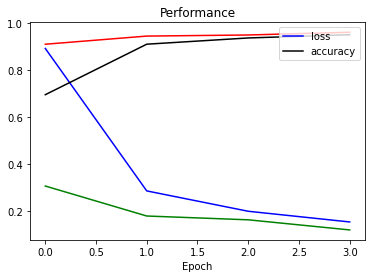

In [9]:
plt.plot(stats.history['loss'], color='blue')
plt.plot(stats.history['accuracy'], color='black')
plt.plot(stats.history['val_loss'], color='green')
plt.plot(stats.history['val_accuracy'], color='red')
plt.title('Performance')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Loss: {} \nAccuracy : {}'.format(score[0], score[1]))

Loss: 0.1390123963356018 
Accuracy : 0.9559999704360962


In [11]:
predictions = numpy.argmax(model.predict(x_test), axis =1)

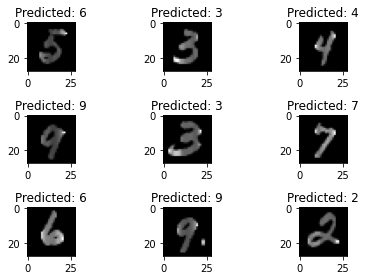

In [12]:
figure, axes = plt.subplots(3,3)
random_number = random.randint(0,x_test.shape[0])
plot_samples = x_test[random_number:random_number+9,:,:]
plot_samples_values = predictions[random_number:random_number+9]

for index in range(9):
    ax = axes[index//3, index%3]
    ax.imshow(plot_samples[index], cmap='gray')
    ax.set_title('Predicted: {}'.format(plot_samples_values[index]))
    
plt.tight_layout()
plt.show()